In [168]:
# Imports

import pandas as pd
import os
import glob

#### Merge the 12 months of sales data into a single file.

In [169]:
# Take an initial look at what the data from a month looks like.

In [170]:
jan_19 = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

In [171]:
feb_19 = pd.read_csv('./Sales_Data/Sales_February_2019.csv')

In [172]:
jan_19.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [173]:
feb_19.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [174]:
# How can we import all of the files from the directory at once?

files = [file for file in os.listdir('./Sales_Data')]

for csv in files:
    print(csv)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [175]:
# Concatenate these files to make one csv.

all_months = pd.DataFrame()

for csv in files:
    df = pd.read_csv('./Sales_Data/'+csv)
    all_months = pd.concat([all_months, df])

# We've now created one csv with each months data entitled all_months_data.csv.   
all_months.to_csv('all_months_data.csv', index=False)

In [176]:
data = pd.read_csv('all_months_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [177]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [178]:
# Another method given that the columns in each file are all the same...

# Resource
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

path = r'./Sales_Data'
all_files = glob.glob(os.path.join(path, '*.csv'))

df_for_each_month = (pd.read_csv(file) for file in all_files)
concatenated_df = pd.concat(df_for_each_month, ignore_index=True)

In [179]:
concatenated_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## How can we think about cleaning the data...

In [180]:
# How many null values are there in each column?

data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [181]:
# How many rows have NaN values?
# Save as a dataframe.

nan_data = data[data.isna().any(axis=1)]

row_count = nan_data.shape[0]
column_count = nan_data.shape[1]

In [182]:
nan_data.shape

(545, 6)

In [183]:
row_count

545

In [184]:
column_count

6

In [185]:
data = data.dropna(how='all')

In [186]:
# Confirm NaN values were dropped.

data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [187]:
data.shape

(186305, 6)

In [188]:
# Add a month column to the dataframe.

# Take the first two numbers of the order date to capture month.

data['Month'] = data['Order Date'].str[0:2]

In [189]:
# We can't convert month data to an integer yet.
# Find where 'Or' is appearing in the Month column.

temp_df = data[data['Month'] == 'Or']

In [190]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [191]:
# To filter out 'Or' using the Month columnn...

data = data[data['Month'] != 'Or']
data.shape

(185950, 7)

In [192]:
# Now convert Month column from string to integer.

data['Month'] = data['Month'].astype(int)

In [193]:
# To see the data type of a value in the Month column. Use the first
# value as an example.

type(data['Month'][0])

numpy.int64

### Question 1

#### What was the best month for sales? How much was earned that month?

In [194]:
# Convert month column from string to integer.

# Check the data types of all of the columns in the dataframe.

data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [195]:
# We'll need to convert the Quantity Ordered and Price Each columns
# data types to integers and floats respectively.

data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

In [196]:
data['Price Each'] = data['Price Each'].astype(float)

In [197]:
# Check data types to verify changes.

data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [198]:
# Add a Sales column to the dataframe.

data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [199]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [200]:
# Now, to answer the question...

total_sales = data.groupby(['Month']).sum()

In [201]:
total_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [202]:
# Change display.

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [203]:
# Return the row with the highest number of sales. We see that the 
# month of December had the most sales.

total_sales[total_sales['Sales'] == total_sales['Sales'].max()]

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34


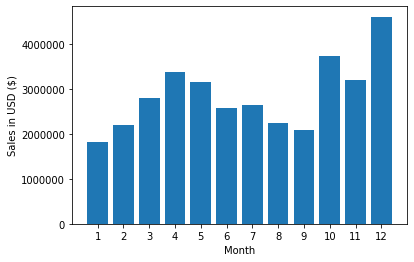

In [204]:
# How could we plot this?

import matplotlib.pyplot as plt

plt.bar(range(1, 13), total_sales['Sales'])
plt.xticks(range(1, 13))
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show();

### Question 2

#### What US city had the highest number of sales?

In [205]:
data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


In [206]:
# Create a separate column for city in the dataframe.

data['City, State and Zipcode'] = data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2])

In [207]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"City, State and Zipcode"
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [208]:
data['City'] = data['City, State and Zipcode'].apply(lambda x: x.rsplit(' ', 1)[0])

In [209]:
del data['City, State and Zipcode']

In [210]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [211]:
city_sales = data.groupby(['City']).sum()

In [212]:
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [213]:
# The city with the highest number of sales.

city_sales[city_sales['Sales'] == city_sales['Sales'].max()]

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239,8211461.74,315520,8262203.91


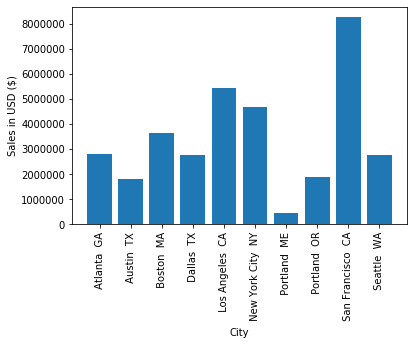

In [214]:
# How could we plot this?

import matplotlib.pyplot as plt

# Ensures x and y values stay aligned.
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, city_sales['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show();

### Question 3

#### What time should we display advertisements to maximize the likelihood of customers buying product?